###### AUTHOR: Aadil Saleem

## Advanced Level Task
## TASK 3- Next Word Prediction
### DataSet Link: : https://drive.google.com/file/d/1GeUzNVqiixXHnTl8oNiQ2W3CynX_lsu2/view

### Importing Libraries and downloading dataSet

In [21]:
import numpy as np
import tensorflow as tf
from nltk.tokenize import RegexpTokenizer
from tensorflow import keras
from google.colab import files
uploaded = files.upload()
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
import matplotlib.pyplot as plt
import pickle
import heapq

Saving 1661-0.txt to 1661-0.txt


In [22]:
path = '1661-0.txt'
text = open(path).read().lower()
print('corpus length:', len(text))

corpus length: 581888


### Data Preprocessing


In [50]:
#Splitting the text file into words
character = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(character))
indices_char = dict((i, c) for i, c in enumerate(character))
 
print(f'unique chars: {len(character)}')

unique chars: 73


In [51]:
#chunk 40 characters with 3 sequences
seq_len = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - seq_len, step):
    sentences.append(text[i: i + seq_len ])
    next_chars.append(text[i + seq_len])
print(f'num training examples: {len(sentences)}')

num training examples: 193950


In [52]:
#Generating the features and labels
X = np.zeros((len(sentences), seq_len, len(character)), dtype=np.bool)
Y = np.zeros((len(sentences), len(character)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    Y[i, char_indices[next_chars[i]]] = 1

sentences[124]
next_chars[100]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


'e'

In [53]:
#one hot encoded data
X[0][0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True])

In [54]:
Y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [55]:
X.shape

(193950, 40, 73)

In [56]:
Y.shape

(193950, 73)

### Building RNN Model

In [57]:
model = Sequential()
model.add(LSTM(128, input_shape=(seq_len, len(character))))
model.add(Dense(len(character)))
model.add(Activation('softmax'))

### Training the Model

In [60]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y,
                    validation_split=0.05,
                    batch_size=128,
                    epochs=8,
                    shuffle=True).history

Epoch 1/8
1440/1440 [==============================] - 163s 111ms/step - loss: 1.5774 - accuracy: 0.5255 - val_loss: 2.0351 - val_accuracy: 0.4375
Epoch 2/8
1440/1440 [==============================] - 160s 111ms/step - loss: 1.4983 - accuracy: 0.5474 - val_loss: 1.9964 - val_accuracy: 0.4488
Epoch 3/8
1440/1440 [==============================] - 161s 112ms/step - loss: 1.4487 - accuracy: 0.5607 - val_loss: 2.0324 - val_accuracy: 0.4565
Epoch 4/8
1440/1440 [==============================] - 161s 112ms/step - loss: 1.4171 - accuracy: 0.5687 - val_loss: 2.0097 - val_accuracy: 0.4632
Epoch 5/8
1440/1440 [==============================] - 160s 111ms/step - loss: 1.3931 - accuracy: 0.5754 - val_loss: 2.0049 - val_accuracy: 0.4658
Epoch 6/8
1440/1440 [==============================] - 160s 111ms/step - loss: 1.3750 - accuracy: 0.5803 - val_loss: 2.0135 - val_accuracy: 0.4666
Epoch 7/8
1440/1440 [==============================] - 160s 111ms/step - loss: 1.3598 - accuracy: 0.5831 - val_loss: 2

### Saving Our Model

In [62]:
model.save('keras.next_word_model.h5')
pickle.dump(history,open('history.p','wb'))
#Loading our Model
model.save('keras.next_word_model.h5')
history=pickle.load(open('history.p','rb'))

### Evaluating The Model

In [64]:
loss_and_acc=model.evaluate(X,Y)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

6061/6061 [==============================] - 88s 15ms/step - loss: 1.3342 - accuracy: 0.5937
Test Loss 1.3342095613479614
Test Accuracy 0.5936890840530396


### Plotting the training and validation plots

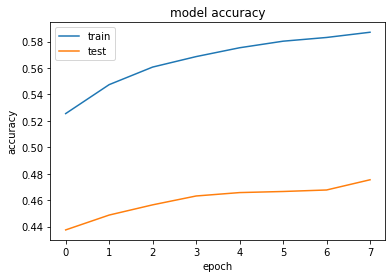

In [66]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

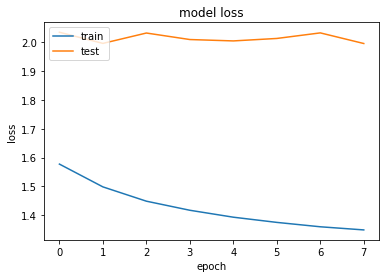

In [67]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

### Testing The Model

In [68]:
def prepare_input(text):
    x = np.zeros((1, seq_len, len(character)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
        
    return x

prepare_input("This is an example of input of our model".lower())

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

### Different Functions

In [69]:
#function to return samples
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)


In [70]:
#function for predicting next word
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [72]:
#Modified above function to predict multiple characters
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]


### Prediction

In [75]:
quotes = [
    "If life were predictable it would cease to be life, and be without flavor.",
    "You only live once, but if you do it right, once is enough.",
    "Many of life’s failures are people who did not realize how close they were to success when they gave up.",
    "Your time is limited, so don’t waste it living someone else’s life. Don’t be trapped by dogma – which is living with the results of other people’s thinking",
    "It is hard enough to remember my opinions, without also remembering my reasons for them!"
]

In [76]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

if life were predictable it would cease 
['the ', 'and ', 'of ', 'in ', 'some ']

you only live once, but if you do it rig
['ht ', 'ned ', 'ed ', 'ant ', 's ']

many of life’s failures are people who d
['oes ', 'rew ', 'id ', 'ay ', 'etails ']

your time is limited, so don’t waste it 
['and ', 'with ', 'of ', 'to ', 'in ']

it is hard enough to remember my opinion
[' and ', ', ', '. ', 's ', 't ']

